In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
df = pd.read_csv('data/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


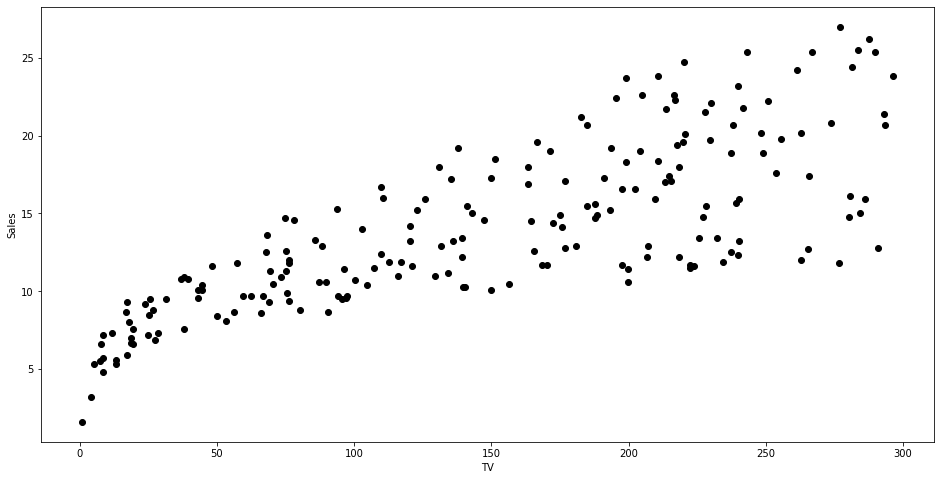

In [3]:
plt.figure(figsize=(16,8))
plt.scatter(df['TV'], df['sales'], c='black')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

In [4]:
X = df['TV'].values.reshape(-1, 1)
y = df['sales'].values.reshape(-1, 1)

reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

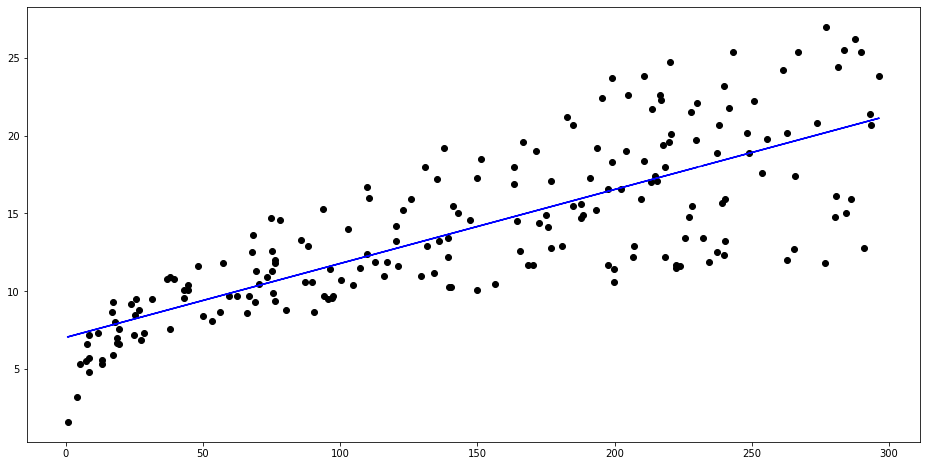

In [5]:
prediction = reg.predict(X)

plt.figure(figsize=(16, 8))
plt.scatter(X, y, c='black')
plt.plot(X, prediction, c='blue')
plt.show()

In [6]:
X = df['TV']
y = df['sales']

exog = sm.add_constant(X)
est = sm.OLS(y, exog).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           1.47e-42
Time:                        10:28:52   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

## Multiple LR

In [7]:
Xs = df.drop(['sales'], axis=1)
y = df['sales'].values.reshape(-1, 1)

reg = LinearRegression()
reg.fit(Xs, y)


LinearRegression()

In [8]:
X = np.column_stack((df['TV'], df['radio'], df['newspaper']))
y = df['sales'].values.reshape(-1, 1)

exog = sm.add_constant(X)
est = sm.OLS(y, exog).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           1.58e-96
Time:                        10:32:27   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0